In [2]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

## 1D Gradient Descent

1) Let us consider the function
$$ f(x) = (x-2)^2 + 1 $$
First plot it.

In [5]:
def f(x):
    return (x-2)**2 + 1
def df(x):
    return 2*x-4

2) If we start at $x=4$, which way should we move and why?

3)If the step size is constants = 1.1, what does the update rule look like?

$$x_{n+1} = \ldots$$

4)Let try it with step size = 1.1. For 10 iteration. Print and plot your point as you go. Can you understand the behavior?

101
[4.   3.61 3.22 2.83 2.44 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05
 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05
 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05
 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05
 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05
 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05
 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05 1.66 2.05
 1.66 2.05 1.66]


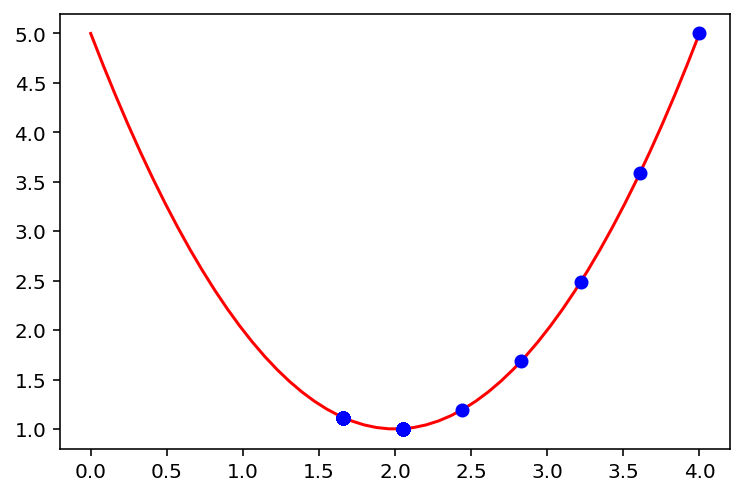

In [16]:
def gradient_descent(df, x0, step, n):
    x = x0
    xs = [x]
    for i in range(n):
        x=x - df(x)/abs(df(x)) * step
        xs.append(x)
    return x, np.array(xs)

xxs = np.linspace(0,4)
plt.plot(xxs, f(xxs),'-r')

x, xs = gradient_descent(df, x0=4, step=0.39, n=100)
ys = f(xs)
print(len(xs))

plt.plot(xs, ys, 'ob')
print(xs)

5)Now let's try step size=0.01 for 100 iteration. Print and plot your point as you go. Can you understand the behavior?

2.0000000000000426


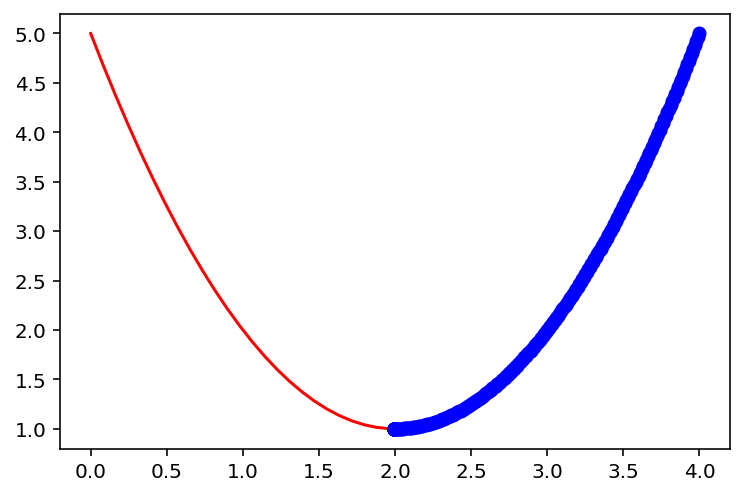

In [18]:
xxs = np.linspace(0,4)
plt.plot(xxs, f(xxs),'-r')

x, xs = gradient_descent(df, x0=4, step=0.01, n=10000)
ys = f(xs)

plt.plot(xs, ys, 'ob')
print(x)

6) When do we want the step size to be small and when do you want the step size to be big?

7) What function kind of does that?

8)If we use that function, what does the update rule looks like.

9) Try it with $\lambda=0.1$. Print and Plot to see what happens?

2.0000000004074074


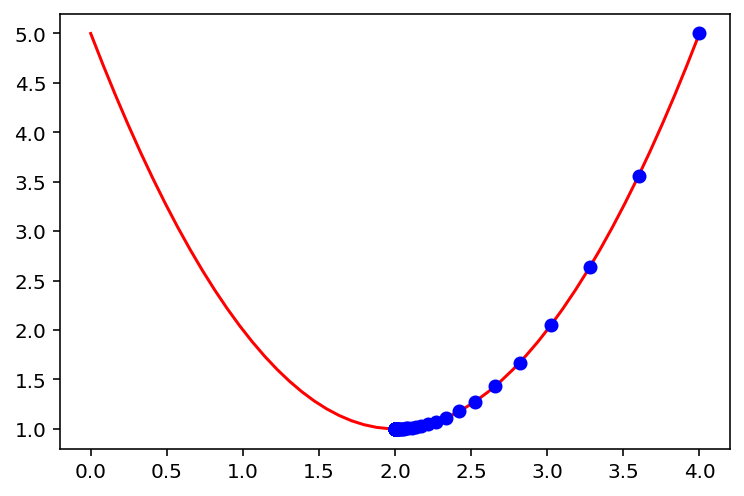

In [21]:
def gradient_descent(df, x0, lmb, n):
    x = x0
    xs = [x]
    for i in range(n):
        x=x - df(x) * lmb
        xs.append(x)
    return x, np.array(xs)
xxs = np.linspace(0,4)
plt.plot(xxs, f(xxs),'-r')
x, xs = gradient_descent(df, x0=4, lmb=0.1, n=100)

ys = f(xs)

plt.plot(xs, ys, 'ob')
print(x)

10) Try it with $\lambda = 1.1$. For 4 iterations. Can you see how it goes?

6.147200000000002


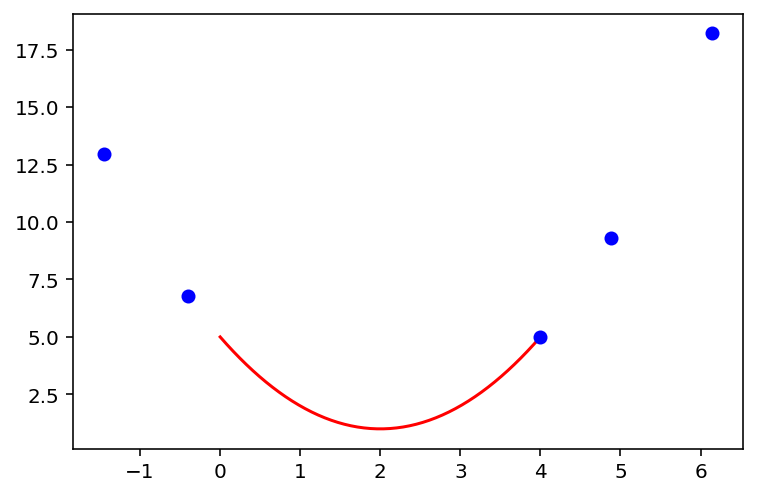

In [23]:
xxs = np.linspace(0,4)
plt.plot(xxs, f(xxs),'-r')
x, xs = gradient_descent(df, x0=4, lmb=1.1, n=4)

ys = f(xs)

plt.plot(xs, ys, 'ob')
print(x)

### Multi-Dimension Gradient Descent

1) Let us consider the function.
$$f(x,y) = (x-2)^2 + xy + y^2 + 1$$
Make the 3D plot.

Text(0.5, 0.92, 'f(x,y)')

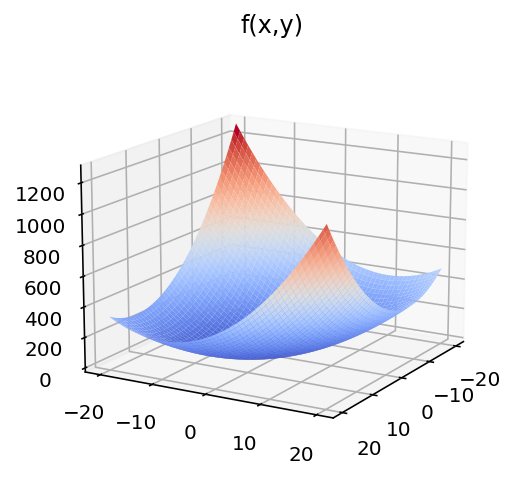

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
def f(x,y):
    return (x-2)**2+x*y+y**2+1
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.gca().view_init(elev=15., azim=30)
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('f(x,y)')

2) Plot the contour.

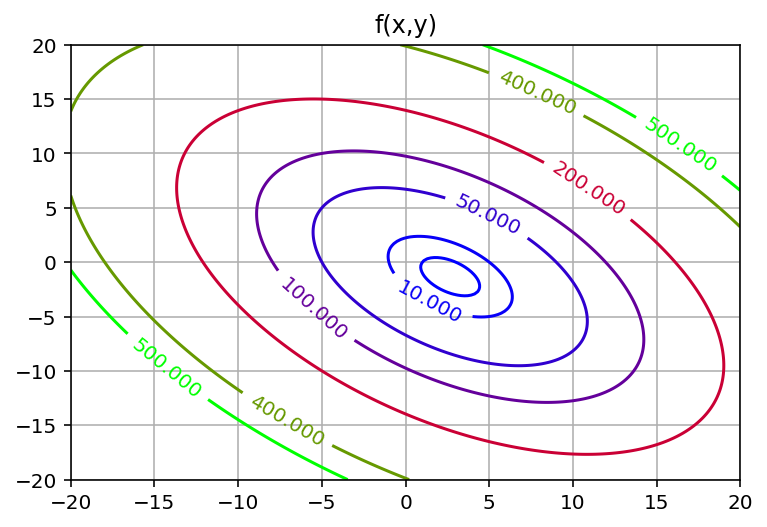

In [39]:
from matplotlib import cm
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html

def plot_data():
    def f(x,y):
        return (x-2)**2+x*y+y**2+1

    nx = 200
    ny = 200
    x = np.linspace(-20,20,nx)
    y = np.linspace(-20,20,ny)
    xgrid, ygrid = np.meshgrid(x, y)
    #print ygrid
    uz = np.zeros((nx,ny))

    for ix in range(nx):
        for iy in range(ny):
            xx = x[ix]
            yy = y[iy]
            uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

    ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
    plt.clabel(ucs, inline=1, fontsize=10)
    plt.grid()
    plt.title('f(x,y)')
plot_data()

3)Where do you think the minimum is?

4)What is the gradient at (10,-15)? Use plt.arrow to plot arrow.

5) If we want to minimize the function which way should we go? Find the unit vector in that direction.

6) What should your update rule look like? Use vector addition.

7) Use what we learn in 1D. How far should we go? What should the update rule really look like?

8) Use $\lambda = 0.1$ and see where the points go

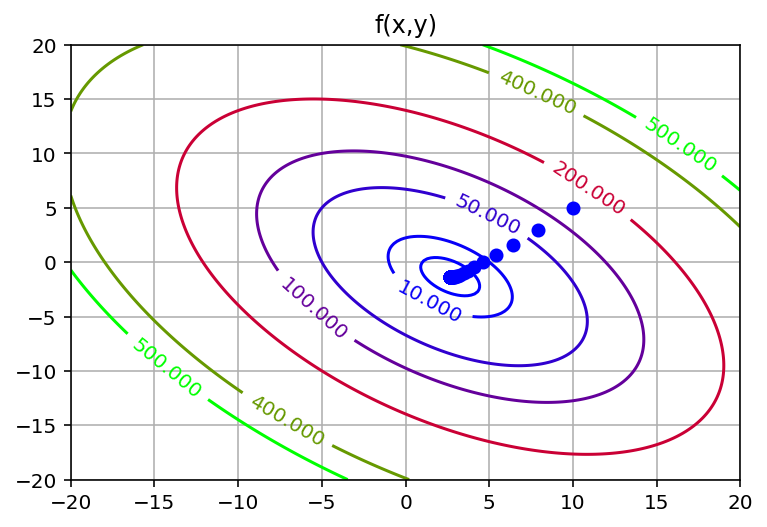

In [48]:
def f(v):
    x, y = v
    return (x-2)**2+x*y+y**2+1.


def partial_i(f, v, i, h=0.001):
    # df/dx_i
    v_p = v.copy()
    v_p[i] += h
    v_m = v.copy()
    v_m[i] -= h
    return (f(v_p) - f(v_m))/(2*h)


def grad(f, v, h=0.0001):
    return np.array([partial_i(f, v, i, h) for i in range(len(v))])


def gradient_descent(f, x0, lmb, n):
    x = x0.copy()
    xs = [x.copy()]
    for i in range(n):
        x = x - lmb*grad(f, x)
        xs.append(x.copy())
    return x, xs

x, xs = gradient_descent(f, np.array([10., 5.]), 0.1, 100)

plot_data()
for v in xs:
    plt.plot(v[0], v[1], 'ob')


### Linear Regression Revisited

Let us consider the problem of findind a line that pass through the points.

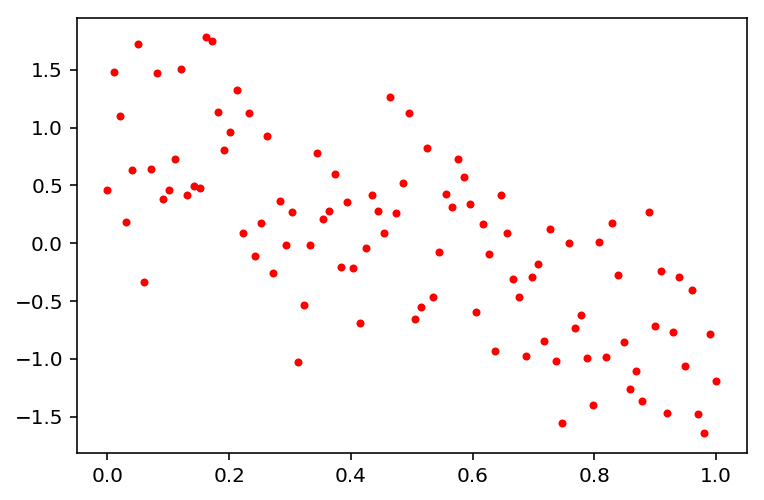

In [5]:
np.random.seed(123)
n = 100
dx = np.linspace(0,1,n)
dy = -2*dx + 1 + np.random.randn(n)/2
plt.plot(dx,dy,'.r')

1) What exactly are we trying to minimize and why?

2) Minimize and Visualize it.

### Separating Line.

We want to draw a separating line betwen two datasets shown below.

In [6]:
np.random.seed(234)
n1 = 100
n2 = 100
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 1]]
r1, r2 = np.random.multivariate_normal(mean, cov, n1).T
#plt.plot(r1, r2, '.r')

mean = [2, 2]
cov = [[1, 0], [0, 1]]
b1, b2 = np.random.multivariate_normal(mean, cov, n2).T
#plt.plot(b1, b2, '.b')

c = np.zeros(n1+n2)
c[:n1] = 1.
c[n1:] = 0.
#print c

d = np.zeros((n1+n2,2))
d[:n1,0] = r1
d[:n1,1] = r2
d[n1:,0] = b1
d[n1:,1] = b2

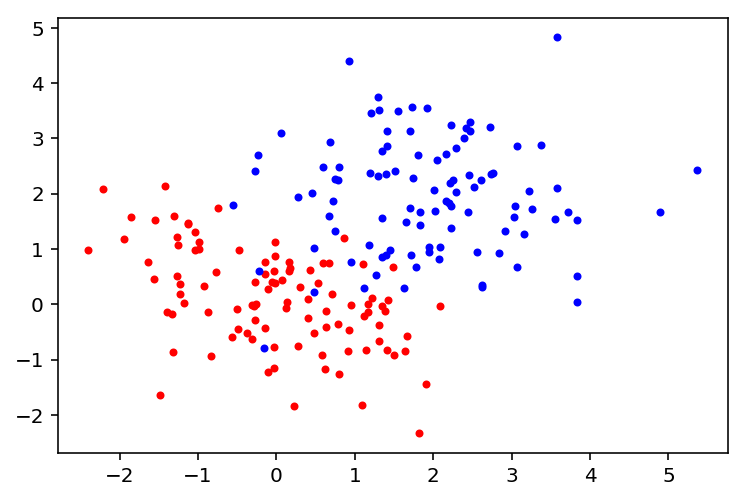

In [7]:
plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing

1) How can we model this as a optimization problem?